In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [196]:
train = pd.read_csv('/Users/saptarshipal/DATA/spaceship-titanic/data/train.csv')
test = pd.read_csv('/Users/saptarshipal/DATA/spaceship-titanic/data/test.csv')
print(train.shape,test.shape)

(8693, 14) (4277, 13)


In [197]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [198]:
train1 = train.copy()
test1 = test.copy()

In [199]:
train1.drop(columns = ['PassengerId','Name','Cabin'],axis =1, inplace =True)
test1.drop(columns = ['PassengerId','Name','Cabin'],axis =1, inplace =True)
#train1.head()

# Imputing

In [200]:
train1.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [204]:
train1.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [205]:
train1[train1.HomePlanet == 'Europa']

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True
10,Europa,True,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8686,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8687,Europa,NaN,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,True
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [219]:
train1.skew()

CryoSleep        0.591110
Age              0.419097
VIP              6.300900
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
Transported     -0.014497
dtype: float64

In [161]:
test1.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [162]:
# Checking null values in rows

train1.isnull().mean(axis=1).sort_values(ascending=False)

5409    0.272727
6904    0.272727
4164    0.272727
1203    0.272727
3535    0.272727
          ...   
3245    0.000000
3244    0.000000
3243    0.000000
3242    0.000000
8692    0.000000
Length: 8693, dtype: float64

In [163]:
test1.isnull().mean(axis=1).sort_values(ascending=False)

488     0.3
2042    0.3
1513    0.2
2134    0.2
4219    0.2
       ... 
1581    0.0
1582    0.0
1583    0.0
1584    0.0
4276    0.0
Length: 4277, dtype: float64

In [164]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer2 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer3 = SimpleImputer(missing_values=np.nan,strategy='mean')

train1['HomePlanet'] = imputer1.fit_transform(train1[['HomePlanet']])
train1['CryoSleep'] = imputer1.fit_transform(train1[['CryoSleep']])
train1['Destination'] = imputer1.fit_transform(train1[['Destination']])
train1['Age'] = imputer2.fit_transform(train1[['Age']])
train1['VIP'] = imputer1.fit_transform(train1[['VIP']])
train1['RoomService'] = imputer3.fit_transform(train1[['RoomService']])
train1['FoodCourt'] = imputer3.fit_transform(train1[['FoodCourt']])
train1['ShoppingMall'] = imputer3.fit_transform(train1[['ShoppingMall']])
train1['Spa'] = imputer3.fit_transform(train1[['Spa']])
train1['VRDeck'] = imputer3.fit_transform(train1[['VRDeck']])


In [165]:
test1['HomePlanet'] = imputer1.fit_transform(test1[['HomePlanet']])
test1['CryoSleep'] = imputer1.fit_transform(test1[['CryoSleep']])
test1['Destination'] = imputer1.fit_transform(test1[['Destination']])
test1['Age'] = imputer2.fit_transform(test1[['Age']])
test1['VIP'] = imputer1.fit_transform(test1[['VIP']])
test1['RoomService'] = imputer3.fit_transform(test1[['RoomService']])
test1['FoodCourt'] = imputer3.fit_transform(test1[['FoodCourt']])
test1['ShoppingMall'] = imputer3.fit_transform(test1[['ShoppingMall']])
test1['Spa'] = imputer3.fit_transform(test1[['Spa']])
test1['VRDeck'] = imputer3.fit_transform(test1[['VRDeck']])

# Encoding

In [166]:
train1.nunique().sort_values(ascending=False)

FoodCourt       1508
Spa             1328
VRDeck          1307
RoomService     1274
ShoppingMall    1116
Age               80
HomePlanet         3
Destination        3
CryoSleep          2
VIP                2
Transported        2
dtype: int64

In [167]:
def age_category(number):
    if number<=12:
        return "child"
    elif number>12 and number <20:
        return "teen"
    elif number>=20 and number <40:
        return "young"
    elif number>=40 and number <50:
        return "middle aged"
    else:
        return "old"

In [168]:
train1['age_category']=train1['Age'].apply(age_category)
test1['age_category']=test1['Age'].apply(age_category)

train1.drop(columns=['Age'],axis=1,inplace=True)
test1.drop(columns=['Age'],axis=1,inplace=True)

In [169]:
train1 = pd.get_dummies(train1,columns=['HomePlanet','CryoSleep','Destination','VIP','age_category'],dtype='int')
#train1.head()

In [170]:
encoder = LabelEncoder()
train1['Transported'] = encoder.fit_transform(train1['Transported'])
train1.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
1,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [171]:
test1 = pd.get_dummies(test1,columns=['HomePlanet','CryoSleep','Destination','VIP','age_category'],dtype='int')
test1.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1
4,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1


# Data visualisation and Cleaning

In [172]:
train1.corr().transpose()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
RoomService,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,-0.139941,-0.067476,0.245451,0.243986,...,-0.024288,-0.062828,0.061098,-0.056595,0.056595,-0.106177,0.024856,0.001638,-0.006976,0.049650
FoodCourt,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,-0.215384,0.365500,-0.124781,0.205682,...,0.134994,-0.065542,-0.078216,-0.126006,0.126006,-0.090480,0.053365,0.034002,-0.075073,0.052519
ShoppingMall,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.071708,-0.021019,0.111257,0.206366,...,-0.013346,-0.031397,0.031603,-0.018483,0.018483,-0.090661,0.023720,-0.013573,0.021430,0.029590
Spa,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,-0.159188,0.266323,-0.088140,0.198392,...,0.075242,-0.053428,-0.032948,-0.060573,0.060573,-0.086907,0.040284,0.048837,-0.039969,0.024812
VRDeck,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,-0.153676,0.282118,-0.111875,0.193107,...,0.089818,-0.045454,-0.050878,-0.123092,0.123092,-0.083440,0.017903,0.030735,-0.057463,0.060689
Transported,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000,-0.168845,0.176916,0.019544,-0.460132,...,0.108722,0.000092,-0.096319,0.037261,-0.037261,0.125399,0.002263,-0.011422,0.016570,-0.079810
HomePlanet_Earth,-0.139941,-0.215384,-0.071708,-0.159188,-0.153676,-0.168845,1.000000,-0.633221,-0.559658,0.107231,...,-0.156169,0.231177,-0.007418,0.162345,-0.162345,0.113805,-0.085285,-0.071660,0.118738,-0.055013
HomePlanet_Europa,-0.067476,0.365500,-0.021019,0.266323,0.282118,0.176916,-0.633221,1.000000,-0.287022,-0.093395,...,0.293517,-0.163308,-0.156958,-0.147008,0.147008,-0.141605,0.084668,0.084766,-0.104360,0.053491
HomePlanet_Mars,0.245451,-0.124781,0.111257,-0.088140,-0.111875,0.019544,-0.559658,-0.287022,1.000000,-0.032715,...,-0.120996,-0.111260,0.177243,-0.043523,0.043523,0.010769,0.014897,-0.002071,-0.035217,0.010813
CryoSleep_False,0.243986,0.205682,0.206366,0.198392,0.193107,-0.460132,0.107231,-0.093395,-0.032715,1.000000,...,-0.065589,-0.087764,0.113380,-0.078281,0.078281,-0.079375,0.018622,0.014379,-0.055035,0.065631


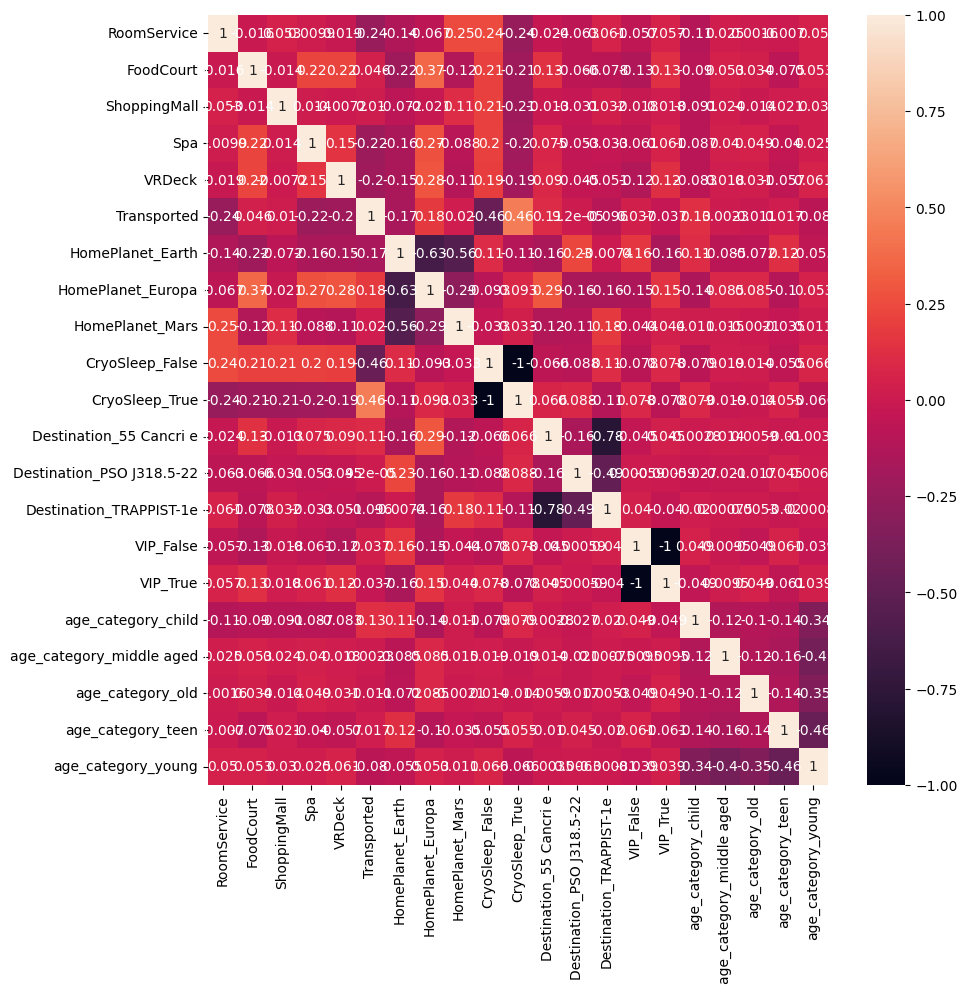

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(train1.corr().transpose(),annot=True)
plt.show()


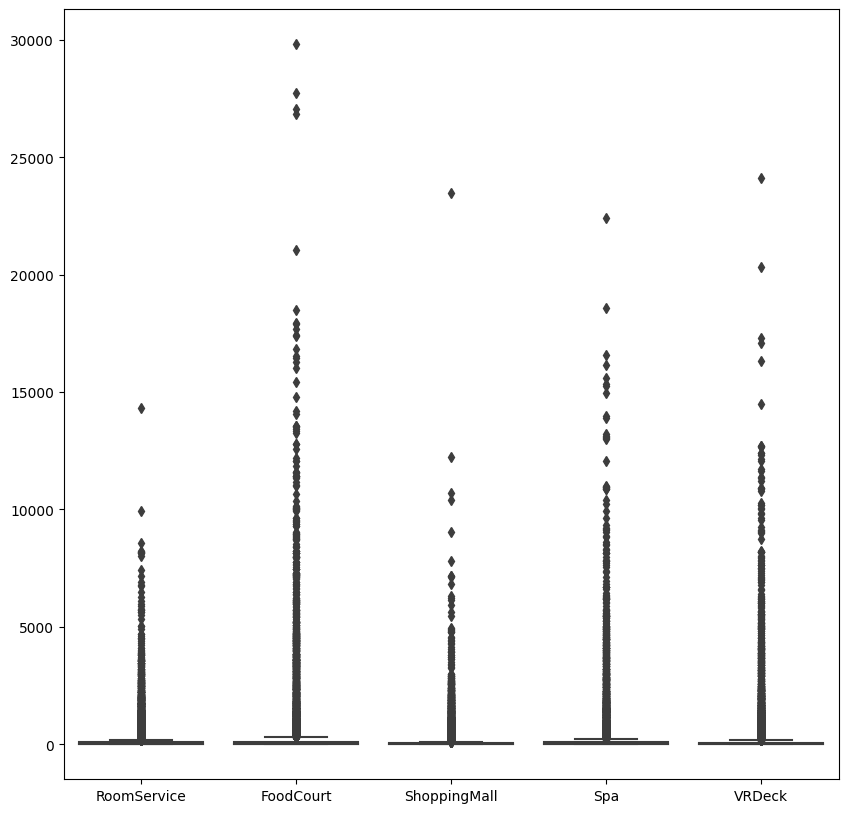

In [174]:
'''
plt.figure(figsize=(10,10))

sns.boxplot(train1[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
plt.show()
''' 

In [175]:
#train1[train1['Spa']>15000]

In [176]:
'''
vif = pd.DataFrame()
vif["feature"] = train1.columns
vif["VIF"] = [variance_inflation_factor(train1.values, i) for i in range(len(train1.columns))]
print(vif.sort_values(by = 'VIF',ascending=False,ignore_index=True))
'''

'\nvif = pd.DataFrame()\nvif["feature"] = train1.columns\nvif["VIF"] = [variance_inflation_factor(train1.values, i) for i in range(len(train1.columns))]\nprint(vif.sort_values(by = \'VIF\',ascending=False,ignore_index=True))\n'

In [177]:
'''
train1.drop(train1[train1['FoodCourt']>20000].index,axis = 0,inplace = True)
train1.drop(train1[train1['Spa']>15000].index,axis = 0,inplace = True)
train1.drop(train1[train1['VRDeck']>15000].index,axis = 0,inplace = True)
train1.drop(train1[train1['ShoppingMall']>15000].index,axis = 0,inplace = True)
train1.drop(train1[train1['Age']==0].index,axis=0,inplace=True)
train1.drop(train1[train1['RoomService']>10000].index,axis = 0,inplace = True)
train1.drop(train1[train1['FoodCourt']>131].index,axis = 0,inplace = True)
train1.drop(train1[train1['ShoppingMall']>10000].index,axis = 0,inplace = True)
train1.drop(train1[train1['Spa']>9000].index,axis = 0,inplace = True)
train1.drop(train1[train1['VRDeck']>10000].index,axis = 0,inplace = True)
train1.shape
'''

"\ntrain1.drop(train1[train1['FoodCourt']>20000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['Spa']>15000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['VRDeck']>15000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['ShoppingMall']>15000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['Age']==0].index,axis=0,inplace=True)\ntrain1.drop(train1[train1['RoomService']>10000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['FoodCourt']>131].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['ShoppingMall']>10000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['Spa']>9000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['VRDeck']>10000].index,axis = 0,inplace = True)\ntrain1.shape\n"

In [178]:
#train1.corr()[['Transported']].sort_values(by = 'Transported',ascending=False)
#train1.drop(columns = 'ShoppingMall',inplace = True)
#train1.shape
 

In [179]:
#train1.describe().transpose()

In [180]:
#sns.boxplot(train1['VRDeck'])

In [181]:
#train1.columns

# Splitting the dataset

In [182]:
y =train1['Transported']
X = train1.drop(columns='Transported')

print(y.shape,X.shape)

(8693,) (8693, 20)


In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)
#y_train =pd.DataFrame(y_train)
#y_test =pd.DataFrame(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6954, 20) (1739, 20) (6954,) (1739,)


# Scaling

In [184]:

#scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

X_train = scaler2.fit_transform(X_train)
X_test = scaler2.fit_transform(X_test)
test1 = scaler2.fit_transform(test1)


In [185]:
'''
X_train_sc =pd.DataFrame(X_train_sc,columns = X_train.columns)
X_test_sc =pd.DataFrame(X_test_sc,columns = X_test.columns)
'''

'\nX_train_sc =pd.DataFrame(X_train_sc,columns = X_train.columns)\nX_test_sc =pd.DataFrame(X_test_sc,columns = X_test.columns)\n'

# Modelling

In [186]:
def evaluate_classifiers(X_train,X_test,y_train,y_test):
    
    models = {
      "Support Vector Classifier": SVC(),
      "K-Nearest Neighbors": KNeighborsClassifier(),
      "Decision Tree": DecisionTreeClassifier(),
      "Random Forest": RandomForestClassifier(), 
      "MLPClassifier": MLPClassifier(),
      "RandomForestClassifier": RandomForestClassifier(), 
      "GradientBoostingClassifier": GradientBoostingClassifier(),
      "AdaBoostClassifier": AdaBoostClassifier(),
      "XGBClassifier": XGBClassifier()
      }
  
    results = []
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)   
        results.append({'name':name,'model':model,'accuracy':accuracy})
    
    
    df_results = pd.DataFrame(results).sort_values(by=['accuracy'],ascending=False, ignore_index= True)
    return df_results
  
df_scores = evaluate_classifiers(X_train, X_test, y_train, y_test)
print(df_scores)



                         name  \
0               MLPClassifier   
1  GradientBoostingClassifier   
2          AdaBoostClassifier   
3               Random Forest   
4      RandomForestClassifier   
5               XGBClassifier   
6   Support Vector Classifier   
7         K-Nearest Neighbors   
8               Decision Tree   

                                               model  accuracy  
0                                    MLPClassifier()  0.792409  
1  ([DecisionTreeRegressor(criterion='friedman_ms...  0.790684  
2  (DecisionTreeClassifier(max_depth=1, random_st...  0.788959  
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.777458  
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.774583  
5  XGBClassifier(base_score=None, booster=None, c...  0.772858  
6                                              SVC()  0.763082  
7                             KNeighborsClassifier()  0.741806  
8                           DecisionTreeClassifier()  0.712478  


In [194]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the Accuracy score of "+str(round(df_scores.iloc[0,2]*100,4))+" %.")

The best model is MLPClassifier with the Accuracy score of 79.2409 %.


In [188]:
selected_model = df_scores.iloc[0,1]
selected_model

MLPClassifier()

In [189]:
selected_model.fit(X_train,y_train)
y_pred1 = selected_model.predict(test1)

In [190]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                          'Transported' : y_pred1})
submission['Transported'] = submission['Transported'].map({1: True, 0: False})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [191]:
submission.to_csv('submission_2.0.csv')